In [269]:
import torch
torch.cuda.is_available()

True

In [270]:
from Data_train import epoch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import numpy as np

create_epoch = epoch.create_epoch

model = XGBRegressor(tree_method='hist')
# X, Y = create_epoch()




# with open("Data_train/Saved/arrayX.txt", "a") as arrayX:
#           np.savetxt(arrayX, X, delimiter=",", fmt='%.4f')

# with open("Data_train/Saved/arrayY.txt", "a") as arrayY:
#           np.savetxt(arrayY, Y, delimiter=",", fmt='%.4f')


In [271]:
X = np.loadtxt("Data_train/Saved/arrayX.txt", delimiter=",")
Y = np.loadtxt("Data_train/Saved/arrayY.txt", delimiter=",")

In [272]:
X = X[:, :17]

In [273]:
temp = X[80:1000:350]
temp

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4.,
        4.],
       [1., 2., 0., 2., 2., 3., 4., 2., 2., 0., 5., 3., 0., 1., 1., 3.,
        4.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        4.]])

In [274]:
# Giữ lại một số sku để test
sku_test = 103
sku_train = round(X.shape[0]/351 - sku_test)

In [275]:

X[:sku_train*351].shape

(280800, 17)

In [276]:
# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = X[:sku_train*351], X[sku_train*351:], Y[:sku_train*351], Y[sku_train*351:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280800, 17)
(36153, 17)
(280800,)
(36153,)


In [277]:
model.fit(X_train, y_train)
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [278]:
# make predictions for test data
y_pred = model.predict(X_test)

In [279]:
np.sqrt(np.square(np.subtract(y_test, y_pred))).sum()/y_test.shape[0]

1.0446429248546805

In [280]:
y_pred_int = np.asarray(y_pred, dtype = np.int32)
y_pred_int[y_pred_int < 0] = 0

In [281]:

print('Số lượng lable > 0',len(y_test[y_test > 0]))
print('Số lượng lable == 0',len(y_test[y_test == 0]))

print('Số lượng pred > 0',len(y_pred_int[y_pred_int > 0]))
print('Số lượng pred == 0',len(y_pred_int[y_pred_int == 0]))
print('Số lượng pred == 0',len(y_pred_int[y_pred_int < 0]))

Số lượng lable > 0 16167
Số lượng lable == 0 19986
Số lượng pred > 0 14365
Số lượng pred == 0 21788
Số lượng pred == 0 0


In [282]:
total = len(y_test[y_test == 0])
acc = ((y_test == 0) & (y_pred_int == 0)).sum()
acc/total

0.8580006004202942

In [283]:
condition = np.where(y_test != 0)
np.sqrt(np.square(np.subtract(y_test[condition], y_pred[condition]))).sum()/y_test.shape[0]

0.7709770291726495

In [284]:
print(np.max(np.subtract(y_test[condition], y_pred[condition])))
print(np.min(np.subtract(y_test[condition], y_pred[condition])))

152.73596954345703
-54.477073669433594


<AxesSubplot:>

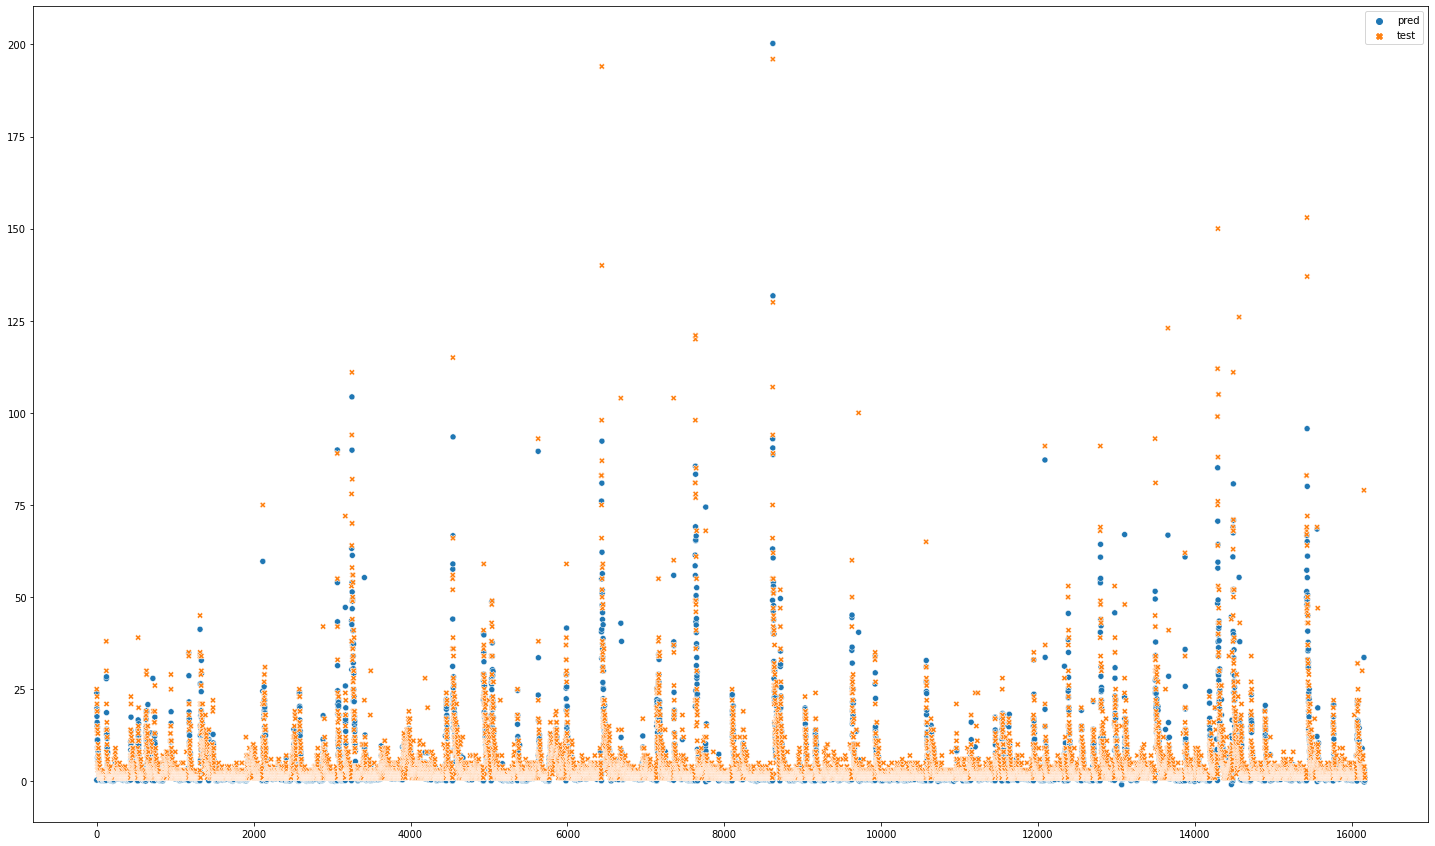

In [285]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
condition = np.where(y_test != 0)

df = pd.DataFrame({ 'pred': y_pred[condition],
                    'test':  y_test[condition]})

fig, ax = plt.subplots(figsize = (25, 15))
sns.scatterplot(data = df, ax = ax)

In [286]:
for test, pred in zip(y_test, y_pred):
          print('test:', test)
          print('pred:', np.round(pred))

test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: -0.0
test: 0.0
pred: -0.0
test: 0.0
pred: -0.0
test: 0.0
pred: -0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 0.0
test: 0.0
pred: 1.0
test: 25.0
pred: 0.0
test: 14.0
pred: 24.0
test: 19.0
pred: 20.0
test: 21.0
pred: 18.0
test: 14.0
pred: 15.0
test: 23.0
pred: 16.0
test: 19.0
pred: 19.0
test: 13.0
pred: 15.0
test: 15.0
pred: 11.0
test: 14.0
pred: 11.0
test: 9.0
pred: 11.0
test: 4.0
pred: 9.0
test: 9.0
pred: 7.0
test: 5.0
pred: 6.0
test: 3.0
pred: 5.0
test: 13.0
pred: 9.0
test: 10.0
pred: 9.0
test: 9.0
pred: 8.0
test: 4.0
pred

In [287]:
X_test.shape[0]/103

351.0

In [288]:
round(np.random.rand()*100)

61

In [289]:
num = round(np.random.rand()*100)


temp = X_test[351*num + 50:60 + 351*num, :17].copy()
print(temp)

temp = y_test[351*num + 50:60 + 351*num].copy()
print(temp)


[[ 6. 14. 18.  8.  7.  8.  9.  5.  2.  1.  0.  0.  0.  0.  0.  5.  3.]
 [14. 18.  8.  7.  8.  9.  5.  2.  1.  0.  0.  0.  0.  0.  0.  6.  3.]
 [18.  8.  7.  8.  9.  5.  2.  1.  0.  0.  0.  0.  0.  0.  0.  7.  3.]
 [ 8.  7.  8.  9.  5.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  8.  3.]
 [ 7.  8.  9.  5.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.  3.]
 [ 8.  9.  5.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  3.]
 [ 9.  5.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 11.  3.]
 [ 5.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 12.  3.]
 [ 2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 13.  3.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 14.  3.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<AxesSubplot:>

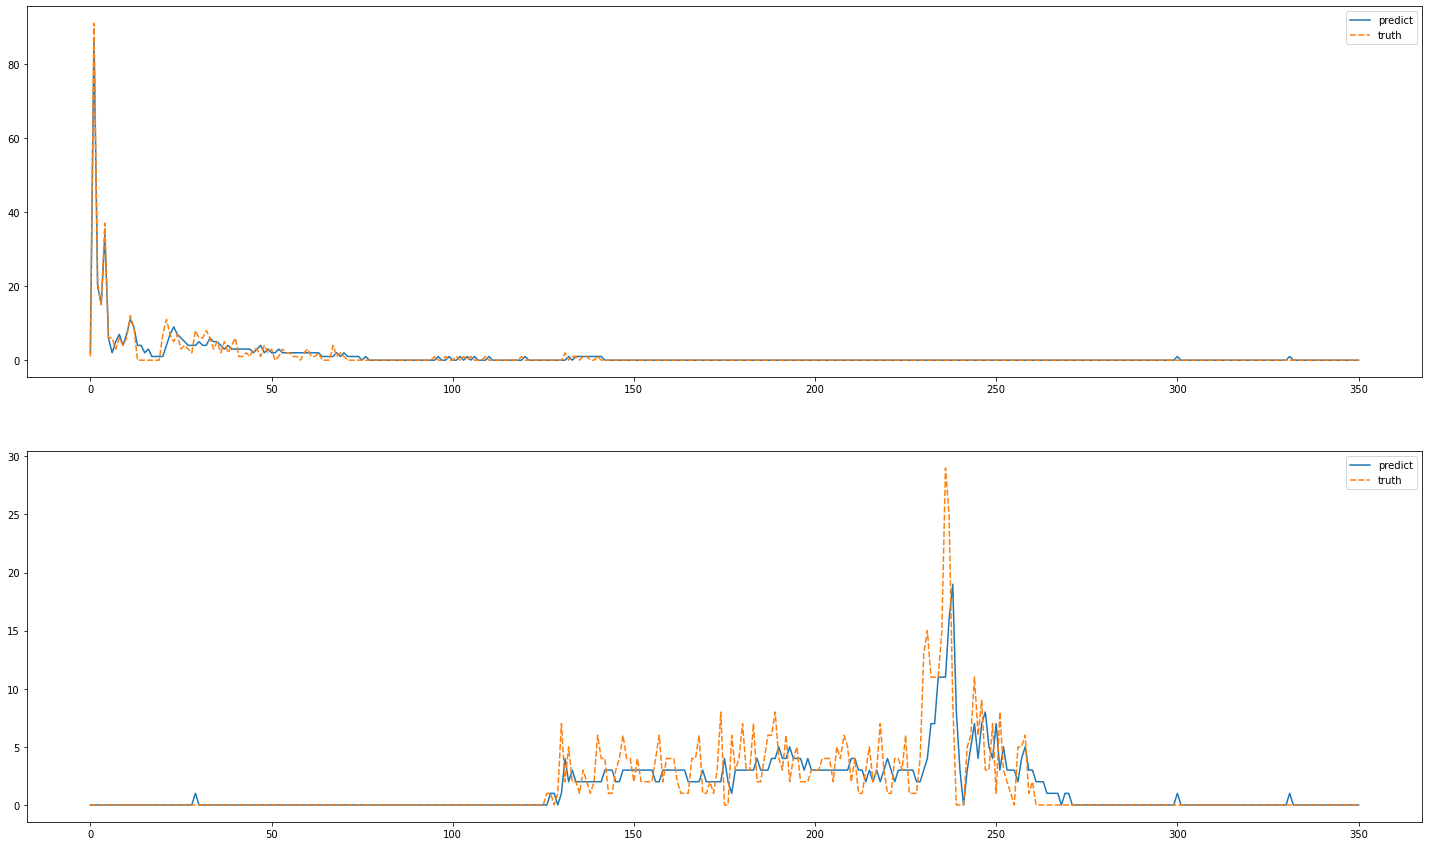

In [290]:
num = round(np.random.rand()*100)


temp = X_test[351*num:351 + 351*num].copy()
result_list = []

history_daytime = temp[0:1]

for i in range(1, 351):
          # Lấy sức bán ngày tiếp theo mode dự đoán
          temp_result = np.round(model.predict(history_daytime))

          # Add sức bán vào list để xí visualize
          result_list.append(temp_result)

          # Lấy thông tin về ngày tháng tiếp theo
          history_daytime = temp[i:i+1]

          if i == 350:
                    result_list.append(np.round(model.predict(history_daytime)))

result_list = np.asarray(result_list)
result_list = result_list[:, 0]
result_list.shape

df = pd.DataFrame({'predict': result_list,'truth': y_test[351*num:351 + 351*num]})

fig, ax = plt.subplots(2,1,figsize = (25, 15))
sns.lineplot(data = df, ax = ax[0])

num = round(np.random.rand()*100)


temp = X_test[351*num:351 + 351*num].copy()

result_list = []

history_daytime = temp[0:1]

for i in range(1, 351):
          # Lấy sức bán ngày tiếp theo mode dự đoán
          temp_result = np.round(model.predict(history_daytime))

          # Add sức bán vào list để xí visualize
          result_list.append(temp_result)

          # Lấy thông tin về ngày tháng tiếp theo
          history_daytime = temp[i:i+1]

          if i == 350:
                    result_list.append(np.round(model.predict(history_daytime)))


result_list = np.asarray(result_list)
result_list = result_list[:, 0]
result_list.shape

df = pd.DataFrame({'predict': result_list,'truth': y_test[351*num:351 + 351*num]})


sns.lineplot(data = df, ax = ax[1])
